In [94]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import gensim
from sklearn.svm import LinearSVC
import random
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sys
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from sklearn.neighbors import KNeighborsClassifier

In [95]:
imdb = "E:/Momo/Datasets/imdbreviews/IMDB Dataset.csv"
imdb2 = "E:/Momo/Datasets/movie.csv/movie.csv"

df = pd.read_csv(imdb2).head(30000)
print(df.shape)
df.head()

(30000, 2)


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [96]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [97]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = gensim.parsing.remove_stopwords(text)
    return text

df['text']=df['text'].apply(clean_text)
df.head()

,text,label
0,grew (b. ) watching loving thunderbirds. mates...,0
1,"movie dvd player, sat coke chips, expectations...",0
2,people know particular time past like feel nee...,0
3,"great biblical movies, bored death minute movi...",0
4,im die hard dads army fan change that. got tap...,1


In [98]:
# Split features and labels
X = df["text"]
y = df["label"]

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print(X_train.shape, X_test.shape)

(21000,) (9000,)


In [99]:
# Create feature vectors
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [106]:
def LinearSVC_fitness(params):
    C, intercept_scaling = params
    model = LinearSVC(C=C, intercept_scaling=intercept_scaling, max_iter=1500)
    model.fit(train_vectors, y_train)
    y_pred = model.predict(test_vectors)
    return -accuracy_score(y_test, y_pred)

def LogisticRegression_fitness(params):
    C, intercept_scaling = params
    model = LogisticRegression(C=C, intercept_scaling=intercept_scaling, max_iter=1500)
    model.fit(train_vectors, y_train)
    y_pred = model.predict(test_vectors)
    return -accuracy_score(y_test, y_pred)

In [ ]:
algorithm_param = {'max_num_iteration': 20,
                   'population_size':10,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}


In [107]:
varbound1= np.array([[0.01,100.0]]*2)

model1=ga(function=LinearSVC_fitness,
            dimension=2,
            variable_type='real',
            variable_boundaries=varbound1,
            algorithm_parameters=algorithm_param,
            function_timeout= 30)

model1.run()

c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 The best solution found:                                                                           
 [5.58050789 7.9603704 ]

 Objective function:
 -0.8884444444444445


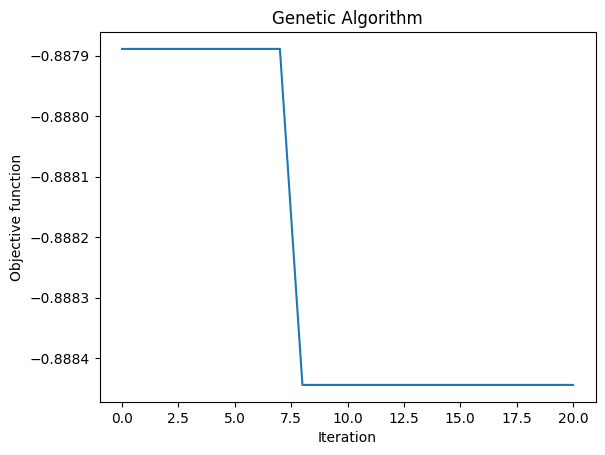

In [ ]:
varbound2= np.array([[0.01,100.0]]*2)

model2=ga(function=LogisticRegression_fitness,
            dimension=2,
            variable_type='real',
            variable_boundaries=varbound2,
            algorithm_parameters=algorithm_param,
            function_timeout= 30)

model2.run()